In [2]:
from paper.topic.common_import import *

universe = pd.Series(['Hour/BTC-USDT-Binance', 'Hour/ETH-USDT-Binance', 'Hour/BNB-USDT-Binance'])
period_universe = pd.Series([('2021-01-01', '2024-01-01'), ('2021-01-01', '2022-01-01'), ('2022-01-01', '2023-01-01'), ('2023-01-01', pd.Timestamp.now())])

def close_volume(ins):
    history = artic_lib.read(ins).data
    volume = history['VOLUME'].rename('{} volume'.format(ins))
    close = history['FINAL'].rename('{} close'.format(ins))
    return close, volume
    # show(close)


Bad key text.latex.preview in file /opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, 

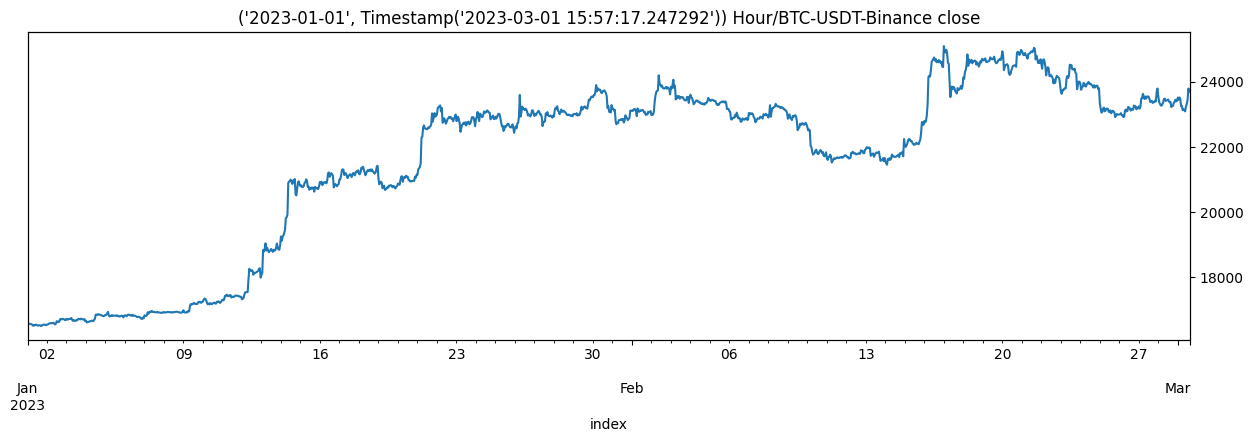

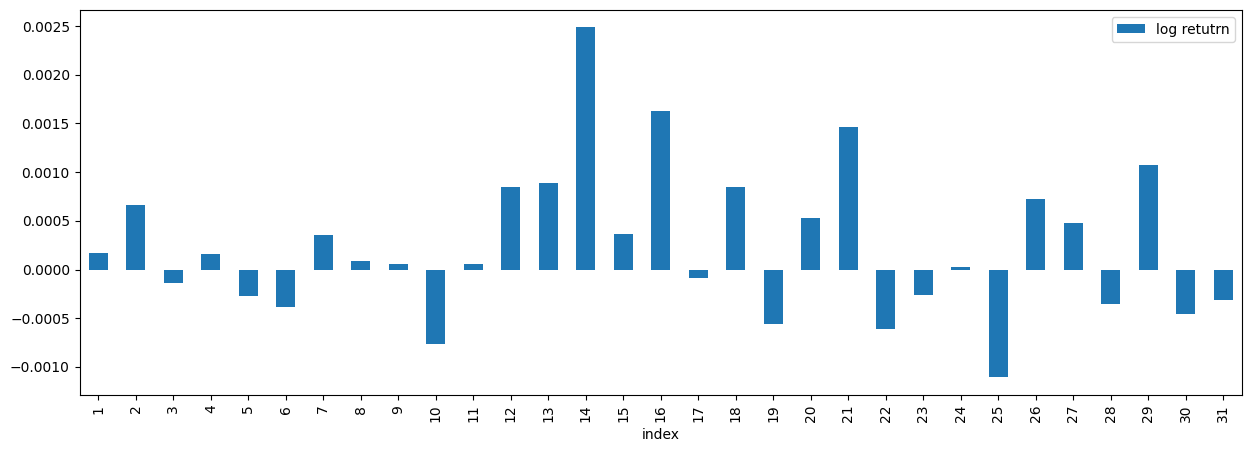

In [120]:
ins = universe.sample(1).iloc[0]
close, volume = close_volume(ins)
# period = period_universe.sample(1).iloc[0]
period = period_universe.iloc[-1]
close = select_period(close, period)
volume = select_period(volume, period)


_ = close.plot(secondary_y=True, figsize=(15, 4))
_ = plt.title('{} {}'.format(period, close.name))
plt.show()

feature = np.log(close).diff().rename('log retutrn').dropna()
_ = feature.groupby(feature.index.day).mean().plot.bar(legend=True, figsize=(15, 5))
# feature.groupby(feature.index.hour).mean().plot.bar(legend=True, figsize=(15, 5))

# split.groupby(split.index.dayofweek).mean().plot.bar(legend=True, figsize=(15, 5))


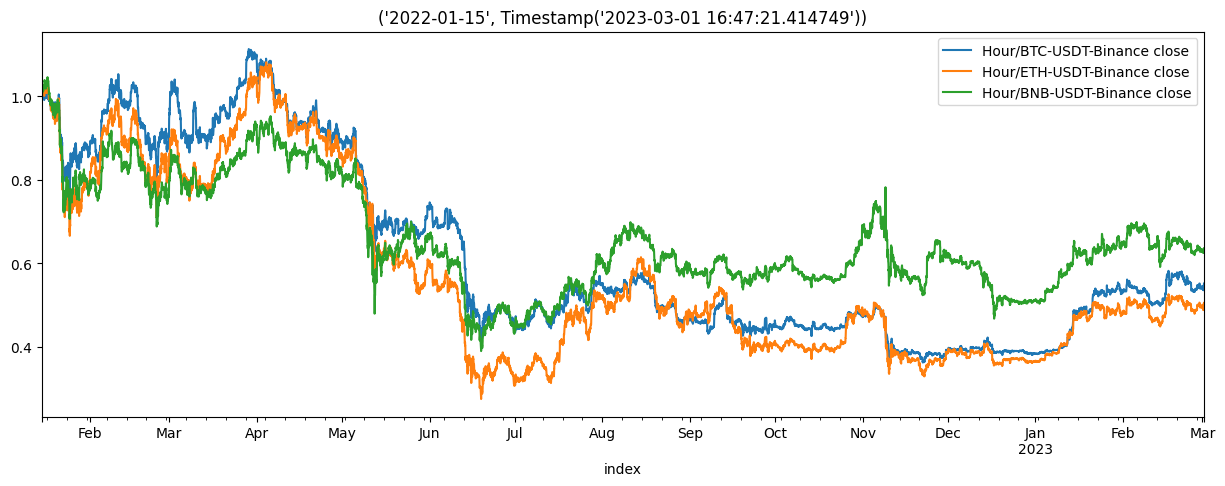

In [152]:
# period = period_universe.iloc[-1]
period = ('2022-01-15', pd.Timestamp.now())

for ins in universe:
    close, volume = close_volume(ins)
    close = select_period(close, period)
    volume = select_period(volume, period)
    
    nav = close / close.iloc[0]
    _ = nav.plot(figsize=(15, 5), legend=True)

    # feature = np.log(close).diff().rename('log retutrn').dropna()
    # _ = feature.groupby(feature.index.day).mean().plot.bar(legend=True, figsize=(15, 5))
    # feature.groupby(feature.index.hour).mean().plot.bar(legend=True, figsize=(15, 5))

    # split.groupby(split.index.dayofweek).mean().plot.bar(legend=True, figsize=(15, 5))
_ = plt.title('{}'.format(period))
plt.show()